In [ ]:
#Import libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import random
from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.pyplot as plt

In [ ]:
#Following function is to generate a sample of 1 million datapoints.
def data_generation():
    """
    To generate random data we used np.random function.
    The data generated needs to br from the sample space of x1 ∼ N (3, 4) and x2 ∼ N (−1, 4) and noise ~ N(0,2).
    The random data was the manipulated to get the required mean and variance.
    new_x1 = random_x1 - mean / var.
    Data generated is put into the hyposthesis to generate corresponding values of y.
    All the data generated is stored in a dataframe.
    """
    x1_ = np.random.sample(range(-10,10),1000000)
    x2_ = np.random.sample(range(-10,10),1000000)
    var = np.random.sample(range(-10,10),1000000)
    for i in range(100000):
        x1_[i] = (x1_[i] - 3)/4
        x2_[i] = (x2_[i] - (-1))/4
        var[i] = (var[i] - 0)/4
    y_=[]
    x0_ = 1
    theta0 = 3
    theta1 = 1
    theta2 = 2
    y_= theta0 * x0_+ theta1 * x1_ + theta2 * x2_ + var
    data = {
        'x1' : x1_ ,
        'x2': x2_ ,
        'y': y_ } 
    df = pd.DataFrame(data, columns = ['x1','x2','y']) 
    df.to_csv('sample.csv', index = False)
    return df,var    

In [ ]:
##generating random test data to test
def generate_random_test_data():
    x1_ = np.random.normal(3,4,(100 * 1)) #generates values with mean 3 and variance 4
    x2_ = np.random.normal(-1,4,(100 * 1)) #generates values with mean -1 and variance 4
    x0_ = 1
    var = np.random.normal(0,2,(100 * 1)) #generates values with mean 0 and variance 2
    y_=[]
    #given theta values
    theta0 = 3
    theta1 = 1
    theta2 = 2
    y_= theta0 * x0_+ theta1 * x1_ + theta2 * x2_ + var #calculate y with hypothesis
    #store the values
    data = {
        'x1' : x1_ ,
        'x2': x2_ ,
        'y': y_ } 
    df = pd.DataFrame(data, columns = ['x1','x2','y']) #dataframe of generated values
    return df ,var  

In [ ]:
#visualise the sample data generated
def visualise_data(df): 
    sns.distplot(df['x1'], kde = False, color ='red')
    sns.distplot(df['x2'], kde = False, color ='blue')
    sns.distplot(df['y'], kde = False, color ='green')

In [ ]:
#differentiation of cost function w.r.t theta0
def deltacost_theta0(x1s, x2s, ys, theta0, theta1, theta2):
    ans = 0
    x0 = 1
    m = len(x1s)
    for i in range(0,m):
        ans = ((theta0) + (theta1 * x1s[i]) + (theta2 * x2s[i]) - ys[i]) + ans   #differentiation w.r.t theta0 
    return ans/m 

In [ ]:
#differentiation of cost function w.r.t theta1
def deltacost_theta1(x1, x2, y, theta0, theta1, theta2):
    ans = 0
    x0 = 1
    m = len(x1)
    for i in range(m):
        ans = ans + ((theta0 * x0) + (theta1 * x1[i]) + (theta2 * x2[i]) - y[i]) * x1[i] #differentiation w.r.t theta1 
    return ans/m 

In [ ]:
#differentiation w.r.t theta2
def deltacost_theta2(x1, x2, y, theta0, theta1, theta2):
    ans = 0
    x0 = 1
    m = len(x1)
    for i in range(m):
        ans = ans + (((theta0 * x0) + (theta1 * x1[i]) + (theta2 * x2[i])) - y[i]) * x2[i] #differentiation w.r.t theta2     
    return ans/m

In [ ]:
def calculate_cost(x1, x2, y,var, theta0, theta1, theta2):
    m = len(x1)
    x0 = 1
    ans = 0
    for i in range(m):
        temp = (((theta0 * x0) + (theta1 * x1[i]) + (theta2 * x2[i]) + var[i]) - y[i]) #(y[i] - h[i])
        ans = ans + np.sum(np.square(temp)) #sum of squares of the error computed
    return ans/(2*m) 

In [ ]:
def calculate_costTest(x1, x2, y, theta0, theta1, theta2):
    m = len(x1)
    x0 = 1
    ans = 0
    for i in range(m):
        temp = ((theta0 * x0) + (theta1 * x1[i]) + (theta2 * x2[i])  - y[i])
        ans = ans + np.sum(np.square(temp))
    return ans/(2*m)

No of iterations:  3900
theta0 =  2.80937624081173 theta1 =  1.0233945272157998 theta2 =  1.9925077906497146
Error in train data with learned parameters =  0.011186243673642062
Error in train data(with 3,1,2):  0.0


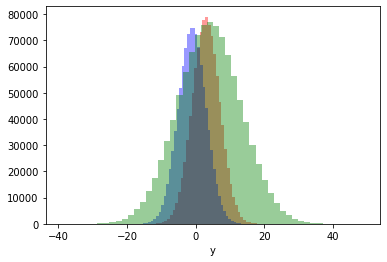

In [ ]:
df, var = data_generation()

##Visualise the generated data
visualise_data(df)

#Initialisations for cost function
theta0 = [0, 1]
theta1 = [0, 1]
theta2 = [0, 1]
#extreact columns from the dataframe
x1_values = df['x1'].tolist()
x2_values = df['x2'].tolist()
y_values = df['y'].tolist()

learning_rate = 0.001
batch_size = 10000
iters = 0

cost = [] #to append new cost values
##cost function and gradient descent
while(abs(calculate_cost(x1_values, x2_values, y_values, var, theta0[-1], theta1[-1], theta2[-1])-calculate_cost(x1_values, x2_values, y_values, var, theta0[-2], theta1[-2], theta2[-2]))> 0.00001):
##while(abs(theta0[-1] - theta0[-2]) > 0.00001 and abs(theta1[-1] - theta1[-2]) > 0.00001 and abs(theta2[-1] - theta2[-2]) > 0.00001):
    new_cost = 0
    for i in range(0,len(x1_values),batch_size):
        x1s = x1_values[i : i + batch_size] #create batches of x1
        x2s = x2_values[i : i + batch_size] #create batches of x2
        ys = y_values[i : i + batch_size] #create batches of y
        theta0_ = theta0[-1] - (learning_rate * (deltacost_theta0(x1s, x2s, ys, theta0[-1], theta1[-1], theta2[-1]))) #calculation of new theta0
        theta1_ = theta1[-1] - (learning_rate * (deltacost_theta1(x1s, x2s, ys, theta0[-1], theta1[-1], theta2[-1]))) #calculation of new theta1
        theta2_ = theta2[-1] - (learning_rate * (deltacost_theta2(x1s, x2s, ys, theta0[-1], theta1[-1], theta2[-1]))) #calculation of new theat2
        theta0.append(theta0_) #add new parameters to the list
        theta1.append(theta1_)
        theta2.append(theta2_)
        iters = iters + 1 #to calculate the no of iterations
        new_cost = new_cost + calculate_cost(x1s, x2s, ys, var, theta0[-1], theta1[-1], theta2[-1]) #new cost
    cost.append(new_cost)
print("No of iterations: ", iters)        
print("theta0 = ",theta0[-1],"theta1 = ",theta1[-1],"theta2 = ",theta2[-1])
print("Error in train data with learned parameters = ", calculate_cost(x1_values, x2_values, y_values, var, theta0[-1], theta1[-1], theta2[-1]))
print("Error in train data(with 3,1,2): ", calculate_cost(x1_values, x2_values, y_values, var, 3, 1, 2))

In [ ]:
test_data = pd.read_csv('q2test.csv')
x1_test = test_data['X_1'].tolist()
x2_test = test_data['X_2'].tolist()
y_test = test_data['Y'].tolist()

print("Error on test data:", calculate_costTest(x1_test, x2_test, y_test, theta0[-1], theta1[-1], theta2[-1]))
print("Error on random test data(with 3,1,2):", calculate_costTest(x1_test, x2_test, y_test, 3, 1, 2))

Error on test data: 1.025992236362064
Error on random test data(with 3,1,2): 0.9829469215000091


In [ ]:
random_test, var = generate_random_test_data()
x1_random = random_test['x1'].tolist()
x2_random = random_test['x2'].tolist()
y_random = random_test['y'].tolist()

print("Error on random test data with learned parameters:", calculate_cost(x1_random, x2_random, y_random, var, theta0[-1], theta1[-1], theta2[-1]))
print("Error on random test data(with 3,1,2):", calculate_cost(x1_random, x2_random, y_random,var, 3, 1, 2))

Error on random test data with learned parameters: 0.009396477737658396
Error on random test data(with 3,1,2): 0.0


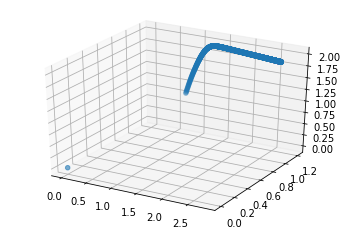

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
theta0 = np.array(theta0)
theta1 = np.array(theta1)
theta2 = np.array(theta2)
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(theta0, theta1, theta2)
plt.show()

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d') #gets the current axis


ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("theta2")


for i in range(len(theta0)):
    if(i%20==0):
      
        ax.scatter3D(theta0[i],theta1[i], theta2[i],color='red',marker='o')#scatter plot in 3D
        fig.canvas.draw() #to create anim
        time.sleep(0.2) #0.2 sec delay

<IPython.core.display.Javascript object>

ValueError: ignored